In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e11/sample_submission.csv
/kaggle/input/playground-series-s5e11/train.csv
/kaggle/input/playground-series-s5e11/test.csv


In [2]:
train_df= pd.read_csv("/kaggle/input/playground-series-s5e11/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s5e11/test.csv")

In [3]:
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
test_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


## 1) EDA

In [5]:
print("missing values in train dataset\n", train_df.isnull().sum())

missing values in train dataset
 id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64


In [6]:
print("missing values in test dataset\n", test_df.isnull().sum())

missing values in test dataset
 id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64


In [7]:
print("\ntarget value distribution\n", train_df["loan_paid_back"].value_counts())


target value distribution
 loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64


In [8]:
print("\ntarget value (%)\n", train_df["loan_paid_back"].value_counts(normalize=True)*100)


target value (%)
 loan_paid_back
1.0    79.881952
0.0    20.118048
Name: proportion, dtype: float64


#### Data is imbalanced. The model has too many examples to learn class "1" (paid) and too few to learn class "0" (did not pay). We will use ROC AUC. 

In [9]:
train_df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


#### The value ranges of the features (columns) are very different from each other. While annual_income is expressed in tens of thousands, debt_to income_ratio is between 0 and 1. We will use feature scaling.

## 2) DATA VISUALIZATION

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


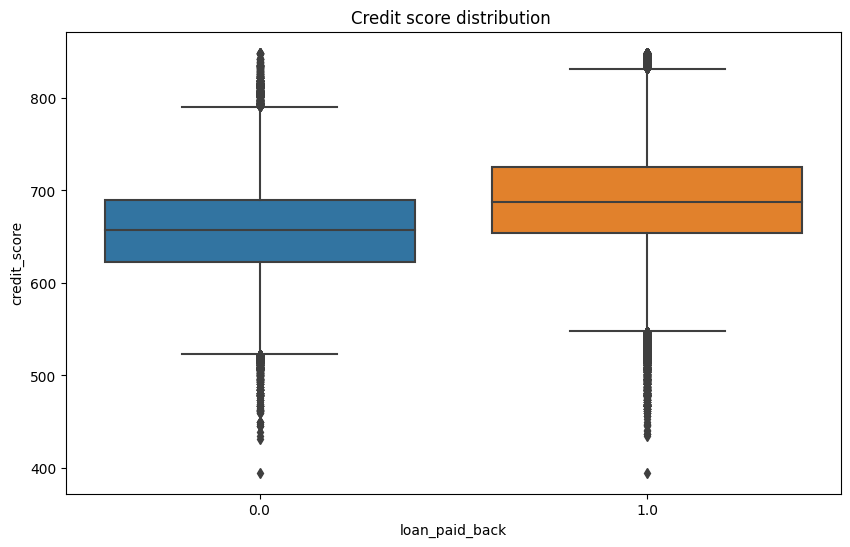

In [11]:
plt.figure(figsize=(10,6))

sns.boxplot(x="loan_paid_back",y="credit_score",data=train_df)

plt.title("Credit score distribution ")
plt.show()

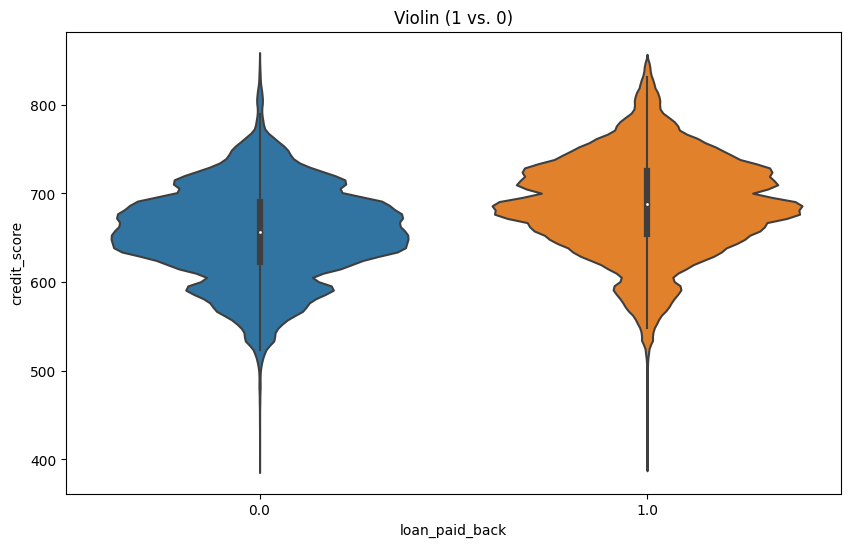

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_paid_back', y='credit_score', data=train_df)
plt.title('Violin (1 vs. 0)')
plt.show()

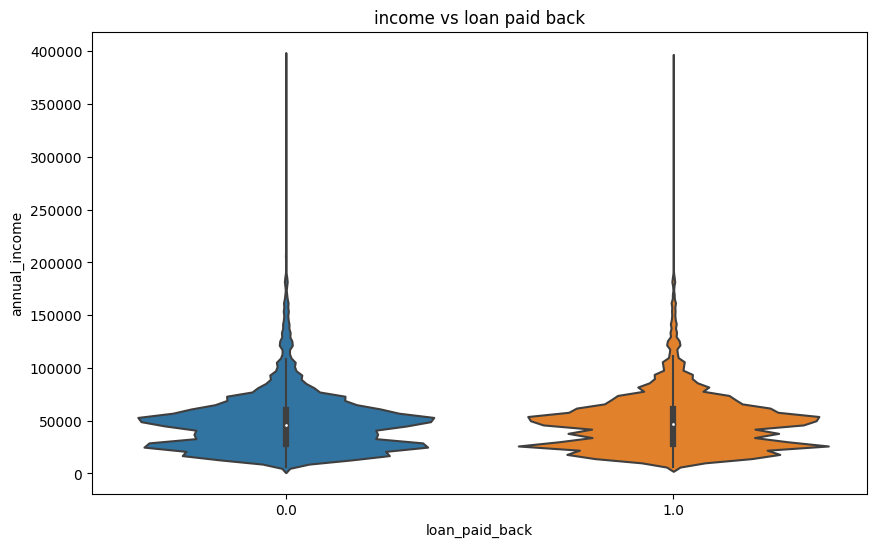

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(x="loan_paid_back", y="annual_income", data=train_df)
plt.title("income vs loan paid back")
plt.show()

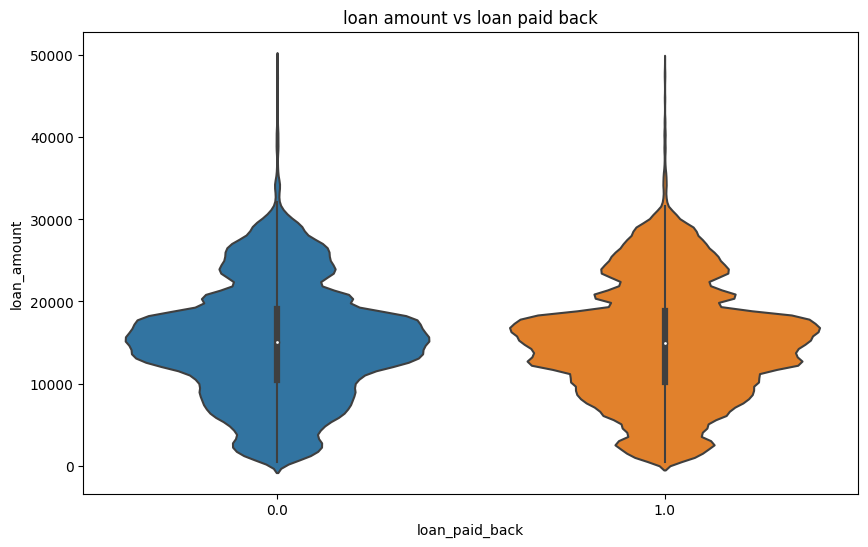

In [14]:
plt.figure(figsize=(10,6))
sns.violinplot(x="loan_paid_back", y="loan_amount", data=train_df)
plt.title("loan amount vs loan paid back")
plt.show()

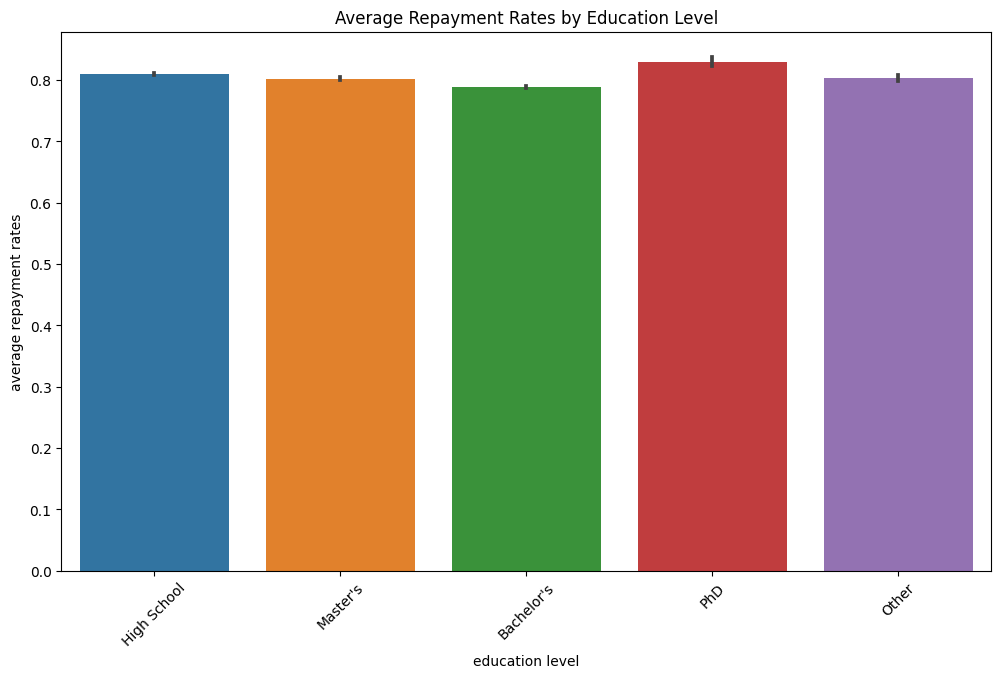

In [15]:
plt.figure(figsize=(12,7))

sns.barplot(x="education_level",y="loan_paid_back",data=train_df)
plt.title('Average Repayment Rates by Education Level')
plt.xlabel("education level")
plt.ylabel("average repayment rates")
plt.xticks(rotation=45)
plt.show()

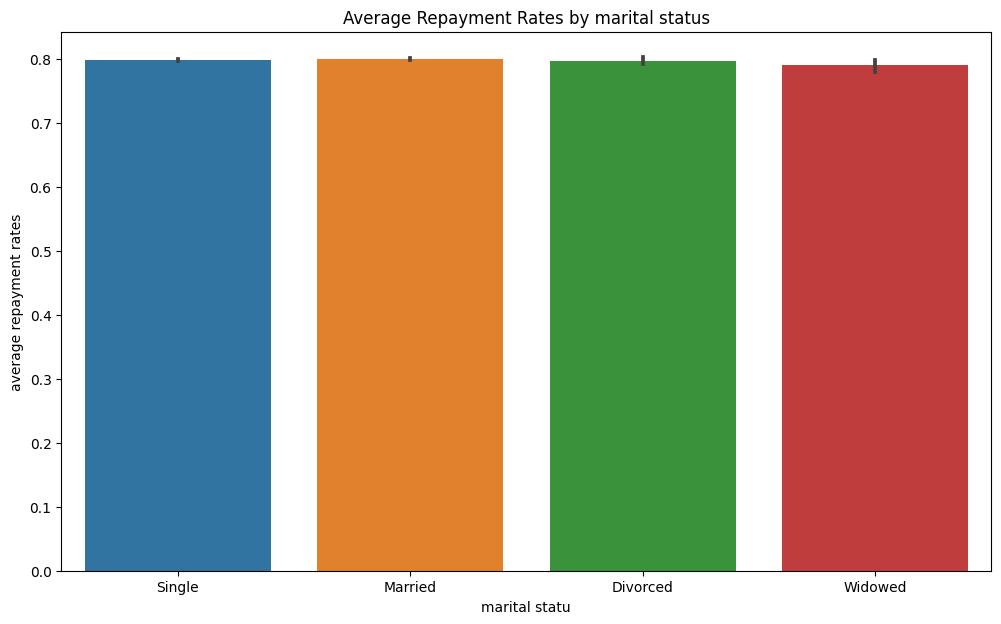

In [16]:
plt.figure(figsize=(12,7))

sns.barplot(x="marital_status",y="loan_paid_back",data=train_df)
plt.title('Average Repayment Rates by marital status')
plt.xlabel("marital statu")
plt.ylabel("average repayment rates")
plt.show()

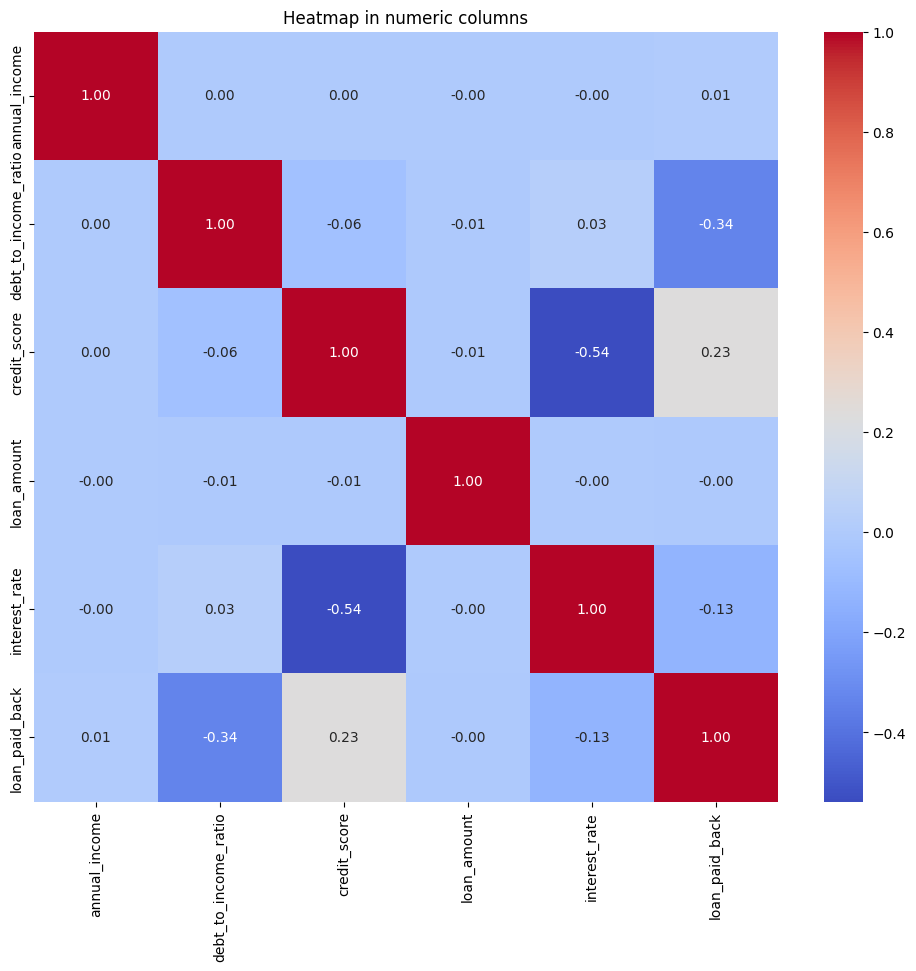

In [17]:
numeric_col=train_df.select_dtypes(include=["number"]).drop(columns=["id"])

corr_matrix=numeric_col.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap in numeric columns')
plt.show()

## 3) PREPROCESSING

In [18]:
from sklearn.model_selection import train_test_split

x=train_df.drop(columns=["loan_paid_back","id"])
y=train_df["loan_paid_back"]

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
x_train.shape

(475195, 11)

In [20]:
x_val.shape

(118799, 11)

In [21]:
numeric_features=x_train.select_dtypes(include=["int64","float64"]).columns.tolist()

categorical_features=x_train.select_dtypes(include=["object"]).columns.tolist()

In [22]:
print(numeric_features)
print(categorical_features)

['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']


#### Make Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_transformer=Pipeline(steps=[("scaler",StandardScaler())])

categorical_transformer=Pipeline(steps=[("encoder",OneHotEncoder(handle_unknown="ignore"))])

preprocessor=ColumnTransformer(transformers=[("num",numeric_transformer,numeric_features),
                                           ("cat",categorical_transformer,categorical_features)])

#### Train the Model(LGBM)(FIRST MODEL)

In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

model=LGBMClassifier(random_state=42, class_weight="balanced",n_jobs=-1)

full_pipeline=Pipeline(steps=[("preprocessor",preprocessor),("model",model)])

print("Training the model")

full_pipeline.fit(x_train,y_train)

y_pred_probs=full_pipeline.predict_proba(x_val)[:,1]

score=roc_auc_score(y_val,y_pred_probs)
print(score)

Training the model
[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1384
[LightGBM] [Info] Number of data points in the train set: 475195, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
0.9191958797331372


In [25]:
test_id=test_df["id"]
x_test=test_df.drop("id",axis=1)

test_prediction_probs=full_pipeline.predict_proba(x_test)[:,1]

submission_df=pd.DataFrame({"id":test_id,"loan_paid_back":test_prediction_probs})

submission_df.to_csv("submission.csv",index=False)

print(submission_df.head())

       id  loan_paid_back
0  593994        0.751373
1  593995        0.931870
2  593996        0.173081
3  593997        0.769488
4  593998        0.847791


## 4) BEST PARAMETERS WITH OPTUNA 

In [26]:
!pip install optuna

In [27]:
import optuna



def objective(trial):
    
    # 1. define parameters
    params = {
        # One of the most influential parameters: Tree complexity
        'num_leaves': trial.suggest_int('num_leaves', 31, 127),
        # learning rate
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        # tree number
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000, step=100),
        # To avoid overfitting (random selection of features)
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        # To avoid overfitting (random selection of subsample)
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        # -(Regularization)
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 0.5),
        
        # constant 
        'random_state': 42,
        'n_jobs': -1,
        'class_weight': 'balanced',
        'verbose': -1 
    }
    
    # 2. define model
    model2 = LGBMClassifier(**params)
    
    # 3. Assemble and train the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model2', model2)])
    
    clf.fit(x_train, y_train)
    
    # 4. Skoru hesapla (ROC AUC)
    y_pred_probs2 = clf.predict_proba(x_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_pred_probs2)
    
    return roc_auc

In [28]:

study = optuna.create_study(direction='maximize')


print("Hyperparameter Optimization Launched with Optuna...")

study.optimize(objective, n_trials=50, show_progress_bar=True)


print("\n==============================================")
print(f"Best ROC AUC Score: {study.best_value:.5f}")
print("Best parameters:")
print(study.best_params)
print("==============================================")

[I 2025-11-18 19:06:39,102] A new study created in memory with name: no-name-e59aec63-546c-427e-9205-5c8a8a04658b


Hyperparameter Optimization Launched with Optuna...


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-18 19:06:51,655] Trial 0 finished with value: 0.9210868776101577 and parameters: {'num_leaves': 70, 'learning_rate': 0.04628517827665981, 'n_estimators': 400, 'colsample_bytree': 0.9120614063198007, 'subsample': 0.6398820356033267, 'reg_alpha': 0.4546088674562341, 'reg_lambda': 0.28565887385000327}. Best is trial 0 with value: 0.9210868776101577.
[I 2025-11-18 19:07:06,603] Trial 1 finished with value: 0.9207982584964478 and parameters: {'num_leaves': 57, 'learning_rate': 0.030690048295084836, 'n_estimators': 500, 'colsample_bytree': 0.9176727917064322, 'subsample': 0.5353912135531882, 'reg_alpha': 0.3930365560938014, 'reg_lambda': 0.4026582678041449}. Best is trial 0 with value: 0.9210868776101577.
[I 2025-11-18 19:07:19,456] Trial 2 finished with value: 0.9178684003662824 and parameters: {'num_leaves': 34, 'learning_rate': 0.012147329118784344, 'n_estimators': 400, 'colsample_bytree': 0.9394454249646549, 'subsample': 0.6366348421252642, 'reg_alpha': 0.05313587702636596, 'r

#### FINAL MODEL TRAINING

In [29]:


# Optuna's best parameters
best_params = {
    'num_leaves': 105, 
    'learning_rate': 0.022269003946117104, 
    'n_estimators': 900, 
    'colsample_bytree': 0.5027355162928253, 
    'subsample': 0.7999279820651789, 
    'reg_alpha': 0.1859335105045552, 
    'reg_lambda': 0.13049523844962085,
    # constant
    'random_state': 42,
    'n_jobs': -1,
    'class_weight': 'balanced',
    'verbose': -1
}

final_model = LGBMClassifier(**best_params)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_model)
])

print("final model training...")
final_pipeline.fit(x_train, y_train) 

y_pred_probs_final = final_pipeline.predict_proba(x_val)[:, 1]
score_final = roc_auc_score(y_val, y_pred_probs_final)
print(f"Kontrol Skoru: {score_final:.5f}") 

final model training...
Kontrol Skoru: 0.92216


#### FINAL TEST RESULTS

In [30]:




# final pipeline predictions
test_predictions_probs2 = final_pipeline.predict_proba(x_test)[:, 1]

# (submission.csv)
submission2_df = pd.DataFrame({
    'id': test_id,
    'loan_paid_back': test_predictions_probs2
})

submission2_df.to_csv('submission_v2.csv', index=False)

submission_df.head()

,id,loan_paid_back
0,593994,0.751373
1,593995,0.931870
2,593996,0.173081
3,593997,0.769488
4,593998,0.847791
